# **TW 관심도 분석**
* ### data file
    * tw data : ./data/ntrend_twData_Final.json
    * insta data :
* ### 가중치 적용
    * POST : 1
    * LIKE : 1.2
    * COMMENT : 1.5
    * MEDIA : 1.7
    

In [2]:
import pandas as pd
import time
import datetime

# data 가져오기
n_tw_data = pd.read_json('./data/ntrend_twData_Final.json')
print(n_tw_data.columns)
n_tw_data

Index(['airmax97', 'airmax_coment', 'airmax_like', 'airmax_media',
       'airmax_post', 'asDate', 'date', 'dis2', 'dis_coment', 'dis_like',
       'dis_media', 'dis_post'],
      dtype='object')


,airmax97,airmax_coment,airmax_like,airmax_media,airmax_post,asDate,date,dis2,dis_coment,dis_like,dis_media,dis_post
0,76.45962,0,0,0,0,1524441600000,2018-04-23,8.57142,0,0,0,0
1,74.84472,0,0,0,0,1524528000000,2018-04-24,6.95652,0,0,0,0
10,75.40372,0,0,0,0,1525305600000,2018-05-03,6.45962,0,0,0,0
11,67.08074,0,0,0,0,1525392000000,2018-05-04,6.33540,0,0,0,0
12,73.60248,0,0,0,0,1525478400000,2018-05-05,7.32919,0,0,0,0
13,93.41614,0,0,0,0,1525564800000,2018-05-06,6.95652,0,0,0,0
14,87.14285,0,0,0,0,1525651200000,2018-05-07,7.01863,0,0,0,0
15,72.60869,0,0,0,0,1525737600000,2018-05-08,6.14906,0,0,0,0
16,71.05590,0,0,0,0,1525824000000,2018-05-09,6.45962,0,0,0,0
17,75.90062,0,0,0,0,1525910400000,2018-05-10,6.83229,0,0,0,0


* ### **naver 와 tw data 분석**

In [3]:
# naver 비율을 맞추기 위한 작업
# POST : 1, LIKE : 1.2, COMMENT : 1.5, MEDIA : 1.7
n_tw_data['airmax_rate_sum'] = (n_tw_data['airmax_post']*1)+(n_tw_data['airmax_like']*1.2)+(n_tw_data['airmax_coment']*1.5)+(n_tw_data['airmax_media']*1.7)
n_tw_data['dis_rate_sum'] = (n_tw_data['dis_post']*1)+(n_tw_data['dis_like']*1.2)+(n_tw_data['dis_coment']*1.5)+(n_tw_data['dis_media']*1.7)
n_tw_data['TW_rate_sum'] = n_tw_data['airmax_rate_sum'] + n_tw_data['dis_rate_sum']

In [4]:
n_tw_data.columns

Index(['airmax97', 'airmax_coment', 'airmax_like', 'airmax_media',
       'airmax_post', 'asDate', 'date', 'dis2', 'dis_coment', 'dis_like',
       'dis_media', 'dis_post', 'airmax_rate_sum', 'dis_rate_sum',
       'TW_rate_sum'],
      dtype='object')

In [5]:
# 필요한 컬럼만 가져오기
TW_sum_rate_data = n_tw_data[['date','dis2','airmax97','airmax_rate_sum','dis_rate_sum','TW_rate_sum']]
TW_sum_rate_data

,date,dis2,airmax97,airmax_rate_sum,dis_rate_sum,TW_rate_sum
0,2018-04-23,8.57142,76.45962,0.0,0.0,0.0
1,2018-04-24,6.95652,74.84472,0.0,0.0,0.0
10,2018-05-03,6.45962,75.40372,0.0,0.0,0.0
11,2018-05-04,6.33540,67.08074,0.0,0.0,0.0
12,2018-05-05,7.32919,73.60248,0.0,0.0,0.0
13,2018-05-06,6.95652,93.41614,0.0,0.0,0.0
14,2018-05-07,7.01863,87.14285,0.0,0.0,0.0
15,2018-05-08,6.14906,72.60869,0.0,0.0,0.0
16,2018-05-09,6.45962,71.05590,0.0,0.0,0.0
17,2018-05-10,6.83229,75.90062,0.0,0.0,0.0


In [6]:
air_rateMax = TW_sum_rate_data['airmax_rate_sum'].max()+0.9
dis_rateMax = TW_sum_rate_data['dis_rate_sum'].max()
TW_rateMax = TW_sum_rate_data['TW_rate_sum'].max()+0.9

In [7]:
print(air_rateMax,dis_rateMax,TW_rateMax) #max값은 16.0

16.0 7.0 16.0


In [8]:
TW_sum_rate_data['air_tw_freq'] = (TW_sum_rate_data['airmax_rate_sum']/TW_rateMax)*100
TW_sum_rate_data['dis_tw_freq'] = (TW_sum_rate_data['dis_rate_sum']/TW_rateMax)*100
TW_sum_rate_data['TW_freq'] = (TW_sum_rate_data['TW_rate_sum']/TW_rateMax)*100

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [9]:
TW_sum_rate_data = round(TW_sum_rate_data,2)

In [10]:
TW_sum_rate_data['nDate'] = pd.to_datetime(TW_sum_rate_data['date'], format='%Y-%m-%d')

In [11]:
TW_Time=TW_sum_rate_data.set_index('date')

In [12]:
TW_Time = TW_Time.sort_index()

In [13]:
TW_Time

,dis2,airmax97,airmax_rate_sum,dis_rate_sum,TW_rate_sum,air_tw_freq,dis_tw_freq,TW_freq,nDate
date,,,,,,,,,
2018-04-23,8.57,76.46,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-23
2018-04-24,6.96,74.84,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-24
2018-04-25,6.77,77.14,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-25
2018-04-26,5.65,70.00,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-26
2018-04-27,5.47,65.59,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-27
2018-04-28,5.90,80.56,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-28
2018-04-29,7.52,88.76,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-29
2018-04-30,6.40,77.33,0.0,0.0,0.0,0.00,0.00,0.00,2018-04-30
2018-05-01,6.02,84.29,0.0,0.0,0.0,0.00,0.00,0.00,2018-05-01


In [14]:
%matplotlib inline
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# D2Coding

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/HANDotum.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [134]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

버전:  2.1.2
설치 위치:  c:\programdata\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\unclepig\.matplotlib
캐시 위치:  C:\Users\unclepig\.matplotlib
1177


In [15]:
#나눔 폰트만 가져오기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [15]:
TW_Time= TW_Time[21:30]

In [16]:
TW_Time

,dis2,airmax97,airmax_rate_sum,dis_rate_sum,TW_rate_sum,air_tw_freq,dis_tw_freq,TW_freq,nDate
date,,,,,,,,,
2018-05-14,7.02,79.38,0.0,5.9,5.9,0.00,36.88,36.88,2018-05-14
2018-05-15,5.53,76.52,0.0,2.5,2.5,0.00,15.62,15.62,2018-05-15
2018-05-16,5.71,68.07,4.0,0.0,4.0,25.00,0.00,25.00,2018-05-16
2018-05-17,4.53,63.98,15.1,0.0,15.1,94.38,0.00,94.38,2018-05-17
2018-05-18,3.73,71.18,7.7,0.0,7.7,48.12,0.00,48.12,2018-05-18
2018-05-19,6.21,67.14,11.5,1.0,12.5,71.88,6.25,78.12,2018-05-19
2018-05-20,6.83,82.05,4.5,7.0,11.5,28.12,43.75,71.88,2018-05-20
2018-05-21,5.16,65.59,5.0,3.9,8.9,31.25,24.38,55.62,2018-05-21
2018-05-22,5.71,71.93,11.0,3.5,14.5,68.75,21.88,90.62,2018-05-22


In [118]:
# TW_Time.to_json('./data/(v)TW_Graph.json')

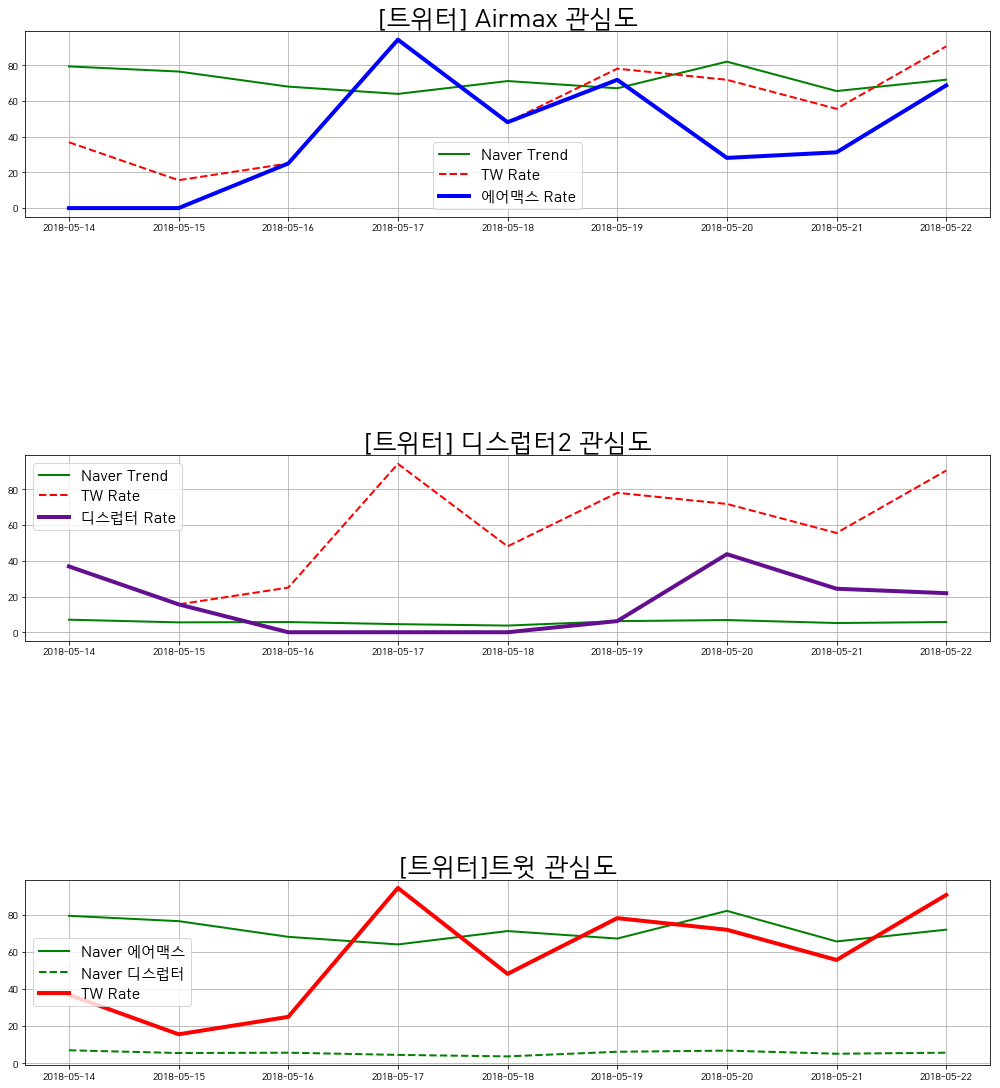

In [28]:
plt.figure(figsize=(14,15))
# fig.subplots_adjust(hspace=10)
plt.subplot(511)
plt.title('[트위터] Airmax 관심도',size='25')
plt.plot(TW_Time['nDate'],TW_Time['airmax97'], color='g', lw=2, label='Naver Trend')
plt.plot(TW_Time['nDate'],TW_Time['TW_freq'], color='r', lw=2, label='TW Rate', linestyle='--')
# plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'])
plt.plot(TW_Time['nDate'],TW_Time['air_tw_freq'], color='b',lw=4, label='에어맥스 Rate')
plt.tight_layout()
# plt.set_ylabel('관심도(%)',size=20)
# ax.set_xlabel('기간',size=20)
# plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.grid(True)
# plt.subplots_adjust()

plt.subplot(513)
plt.title('[트위터] 디스럽터2 관심도',size='25')
plt.plot(TW_Time['nDate'],TW_Time['dis2'],color='g', lw=2, label='Naver Trend')
plt.plot(TW_Time['nDate'],TW_Time['TW_freq'],color='r', lw=2, label='TW Rate', linestyle='--')
plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'],color='#630F90', lw=4, label='디스럽터 Rate')
# ax2.set_ylabel('관심도(%)',size=20)
# ax2.set_xlabel('기간',size=20)plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.grid(True)
# plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'])

plt.subplot(515)
plt.plot(TW_Time['nDate'],TW_Time['airmax97'],color='g', lw=2, label='Naver 에어맥스')
plt.plot(TW_Time['nDate'],TW_Time['dis2'],color='g',lw=2, label='Naver 디스럽터', linestyle='--')
plt.plot(TW_Time['nDate'],TW_Time['TW_freq'],color='r',lw=4, label='TW Rate')
plt.title('[트위터]트윗 관심도',size='25')
# ax2.set_ylabel('관심도(%)',size=20)
# plt.set_xlabel('기간',size=20)
# plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()